In [131]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [132]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [133]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan', 'Czechia']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
Processed 79 lines.
From:  2020-01-22 To 2020-04-08


In [134]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 78
 Poland 78
  Italy 78
     US 78
Germany 78
  Spain 78
 France 78
  Japan 78
Czechia 78


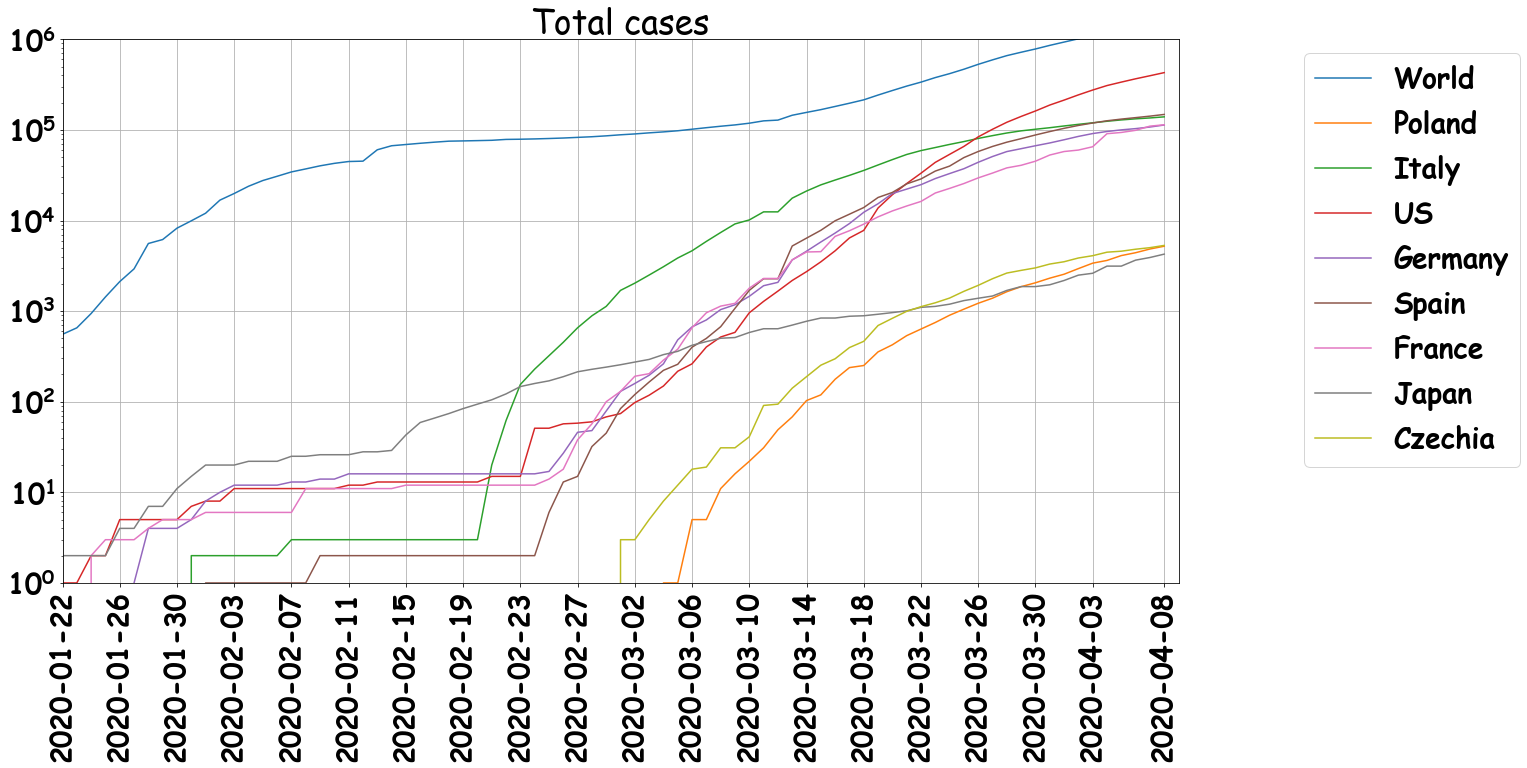

In [135]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

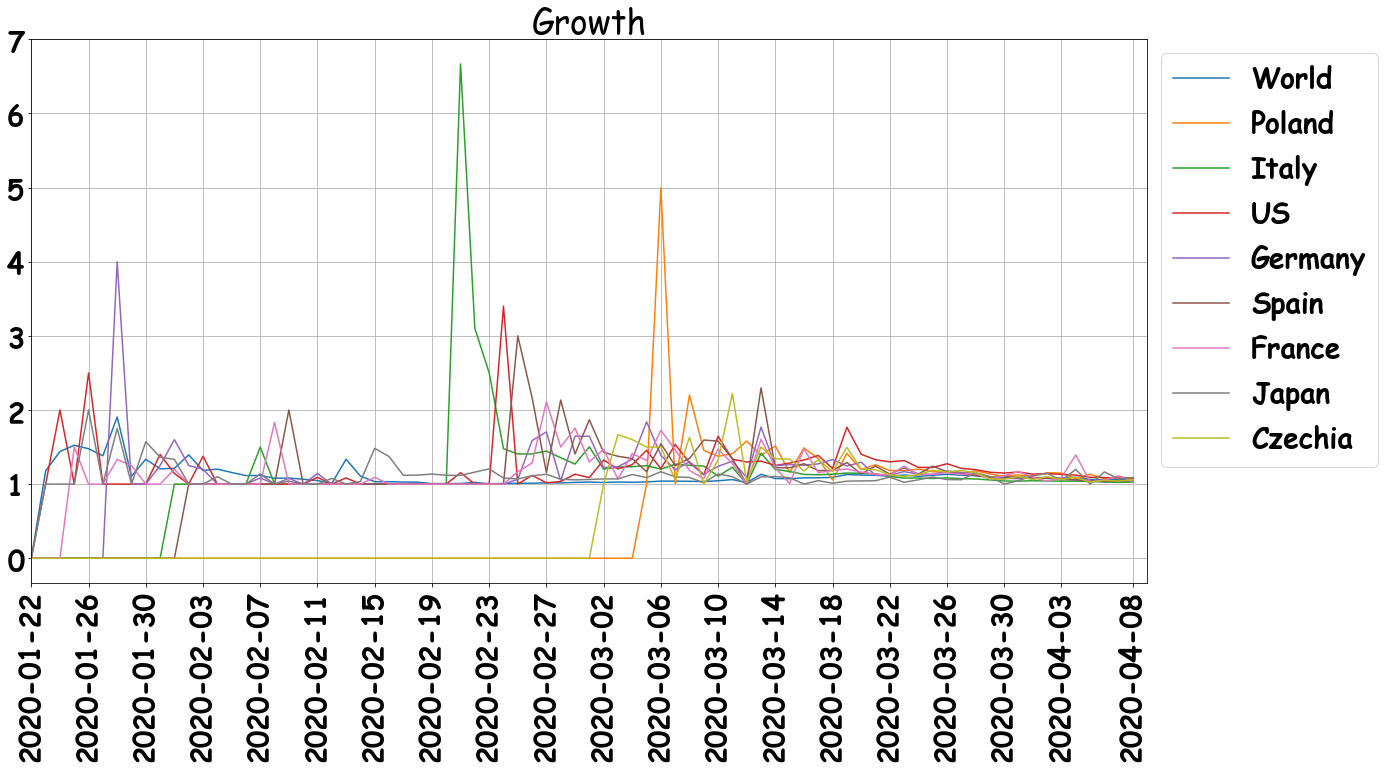

In [136]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(0, clist[0].idx[-1]+1)
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

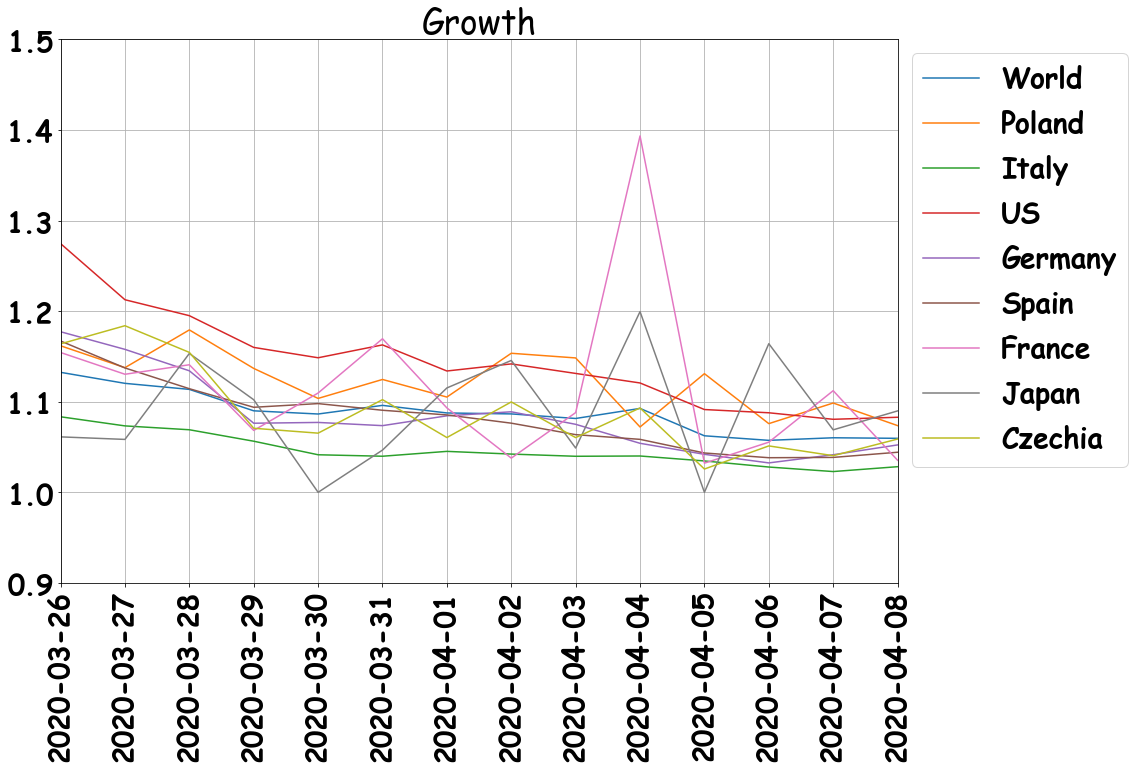

In [137]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-14], clist[0].idx[-1])
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

#### Growth averaged from first detected case

In [138]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), av)

  World 1.1157092177760601
 Poland 1.3506214198408415
  Italy 1.256521487957911
     US 1.2152414281516535
Germany 1.2096643769813926
  Spain 1.2333164938104648
 France 1.1756402226190144
  Japan 1.1140356028160054
Czechia 1.2381790675791466


#### Growth averaged for last 14 days

In [139]:
for d in clist:
    av = np.mean([x for x in d.gf[-14:] if x])
    print("{0:>7}".format(d.name), round(av,3))

  World 1.088
 Poland 1.122
  Italy 1.046
     US 1.145
Germany 1.083
  Spain 1.082
 France 1.116
  Japan 1.09
Czechia 1.088


#### Growth last day:

In [140]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>8}".format(d.con[-1]), "{0:>6}".format(d.con[-1]-d.con[-2]), round(d.gf[-1],3))

  World 2020-04-08  1511104  85008 1.06
 Poland 2020-04-08     5205    357 1.074
  Italy 2020-04-08   139422   3836 1.028
     US 2020-04-08   429052  32829 1.083
Germany 2020-04-08   113296   5633 1.052
  Spain 2020-04-08   148220   6278 1.044
 France 2020-04-08   113959   3894 1.035
  Japan 2020-04-08     4257    351 1.09
Czechia 2020-04-08     5312    295 1.059


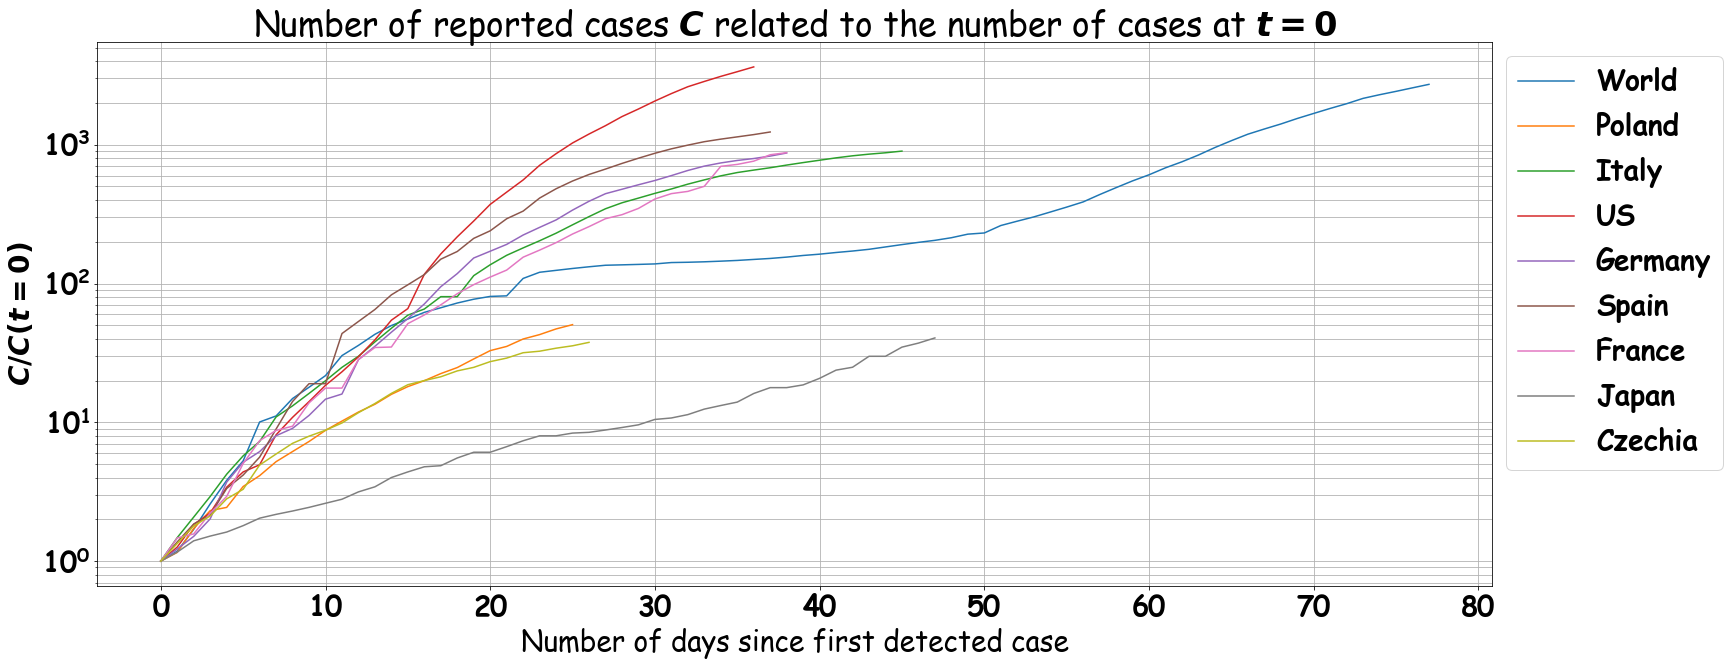

In [141]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [142]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11


In [144]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.07
    exp = round(exp)
    print(i, exp)

1 5569.0
2 5959.0
3 6376.0
4 6822.0
5 7300.0
6 7811.0
7 8358.0
8 8943.0
9 9569.0
10 10239.0
11 10956.0
12 11723.0
13 12544.0
14 13422.0
15 14362.0
16 15367.0
17 16443.0
18 17594.0
19 18826.0
20 20144.0
21 21554.0
22 23063.0
23 24677.0
24 26404.0
25 28252.0
26 30230.0
27 32346.0
28 34610.0
29 37033.0
